Data Introduction

This dataset was updated by Ms.Nancy Al Aswad but The National Institute of Diabetes and Digestive and Kidney Diseases is the original source of this dataset. The dataset's goal is to use specific diagnostic parameters to provide a diagnostic prediction about a patient's likelihood of having diabetes. The selection of these examples from a broader database was subject to a number of restrictions. Specifically, all of the patients here are Pima Indian women who are at least 21 years old.2.
There is just one goal dependent variable (Outcome) and multiple independent variables (a number of medical predictor factors) from the data set in the (.csv) file.


In [35]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/week7/diabetes.csv")

In [38]:
## Dataset Overview
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [39]:
print("Last 10 rows of the dataset")
df.tail(10)

Last 10 rows of the dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [40]:
#Info
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
print("The columns of the dataset")
df.columns

The columns of the dataset


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
# shape
rows,columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 768, Number of columns: 9


In [43]:
#data types
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [44]:
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
#Missing Values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [46]:
print("Checking null values")
df.isna().sum()

Checking null values


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [47]:
print("checking for the duplicates values")
df.duplicated()

checking for the duplicates values


,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


#**EDA**

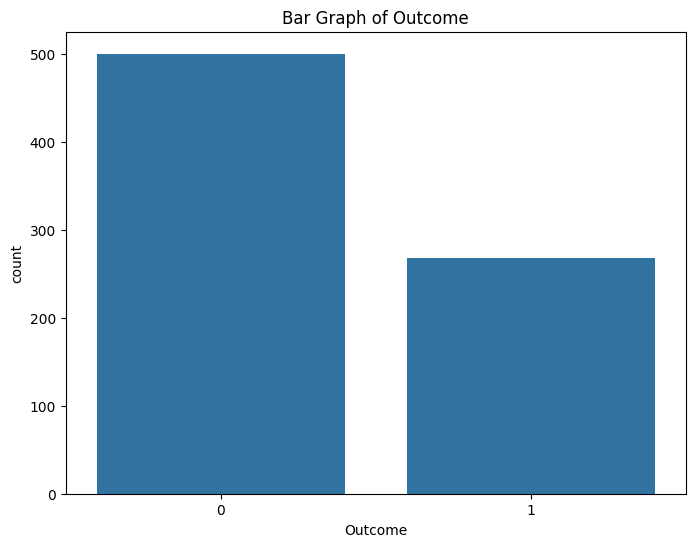

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title("Bar Graph of Outcome")
plt.show()

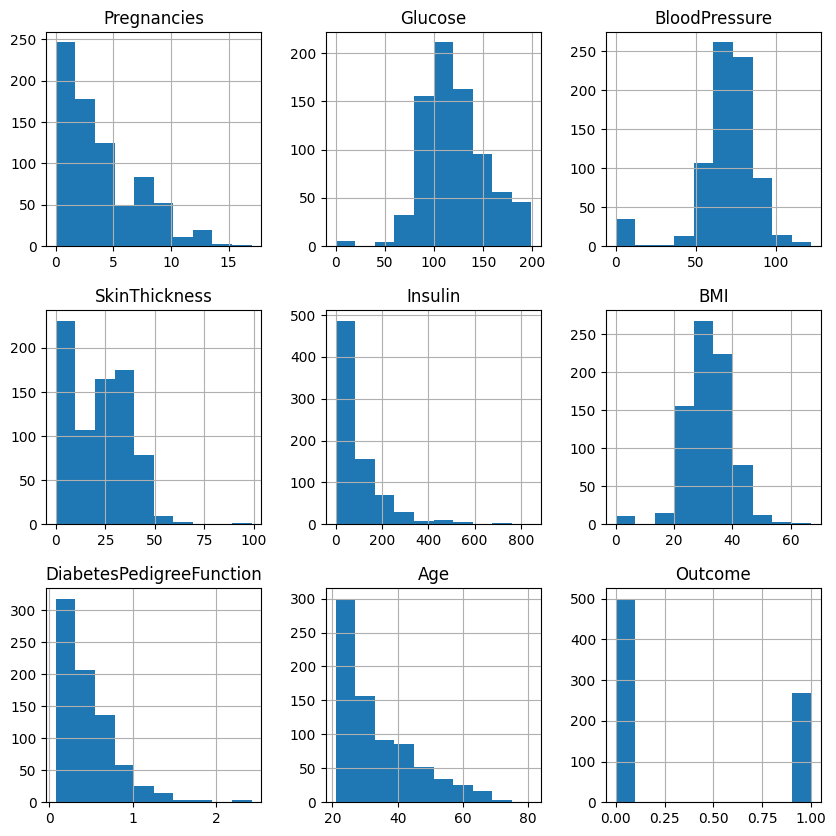

In [49]:
df.hist(figsize=(10, 10))
plt.show()

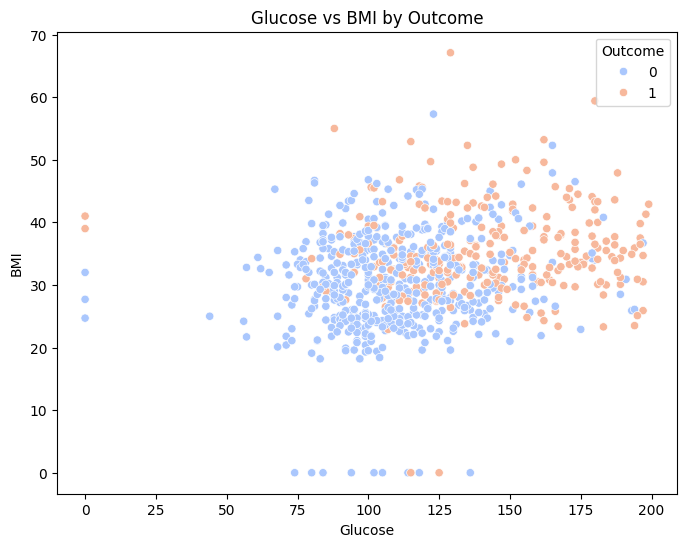

In [50]:
# Scatter plot for Glucose vs BMI colored by Outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm')
plt.title('Glucose vs BMI by Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


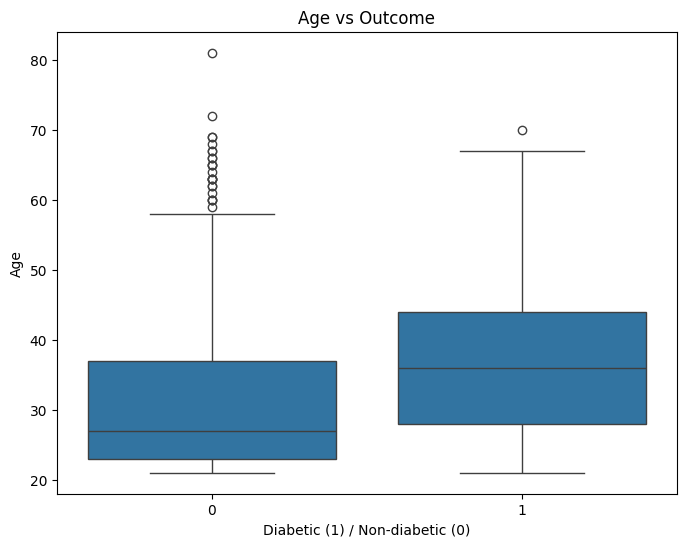

In [51]:
# Boxplot for Age vs Outcome
plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age vs Outcome')
plt.xlabel('Diabetic (1) / Non-diabetic (0)')
plt.ylabel('Age')
plt.show()

#**Data Preprocessing**
(if categorical value then change it into numerical)

In [52]:
#Selecting features variables which includes all features
X = df.drop(columns=['BloodPressure'])
#Target variable
y = df['BloodPressure']

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
#Scaling all features (contimious + encoded categorical variables)
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [55]:
#Train-test spilt(80% traininng, 20%testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
#Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
#Making Predicitions
y_pred = model.predict(X_test)

In [58]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 402.8523890426408
R-squared: 0.19403775986668126


#Classification task to predict diabetes

In [59]:
# logistic regression model
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_clf_log = clf_log.predict(X_test)

In [60]:
# K-nearest Neighbours Model

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_clf_knn = clf_knn.predict(X_test)

In [61]:
# Evaluate Logistic Regression
accuracy_score = (y_test, y_pred_clf_log)
classification_report = (y_test, y_pred_clf_log)
confusion_matrix = (y_test, y_pred_clf_log)

print(f"Accuracy score : {accuracy_score}")
print(f"Classification reoprt : {classification_report}")
print(f"Confusion matrix : {confusion_matrix}")


Accuracy score : (668    58
324    75
624    64
690    80
473    90
       ..
355    88
534    56
344    72
296    70
462    70
Name: BloodPressure, Length: 154, dtype: int64, array([80, 64,  0, 72, 74, 80, 62, 80, 74, 78, 62, 78, 70, 80, 64, 64, 78,
       62,  0, 76, 80, 68, 78, 64, 78, 90, 70, 62, 66, 80, 88, 82, 70,  0,
       82, 70, 90, 66, 78, 76, 68, 82, 78, 62, 62, 64, 82, 78, 72, 88, 62,
       72, 84,  0, 64, 64, 78,  0, 64, 74, 74, 78, 60, 62, 60, 78, 68, 76,
        0, 64, 84, 68, 80, 66, 62, 78, 80, 68, 64, 76,  0, 64, 60, 88, 64,
       90, 78, 64, 68, 68, 64, 76,  0, 62, 88, 78, 80, 68, 64, 80, 90, 64,
       76, 70,  0, 68, 64, 64, 64, 72, 64,  0, 62, 90, 64, 64, 64,  0,  0,
       70,  0, 78, 62, 64,  0, 78, 62, 72, 76, 74,  0, 70, 64, 72, 64,  0,
       62, 76, 82, 62, 64,  0,  0, 64,  0, 78, 72,  0, 78, 74, 68, 80, 64,
       78]))
Classification reoprt : (668    58
324    75
624    64
690    80
473    90
       ..
355    88
534    56
344    72
296    70
462    70
N

In [62]:
# Evaluate KNN
accuracy_score = (y_test, y_pred_clf_knn)
classification_report = (y_test, y_pred_clf_knn)
confusion_matrix = (y_test, y_pred_clf_knn)

print(f"Accuracy score : {accuracy_score}")
print(f"Classification reoprt : {classification_report}")
print(f"Confusion matrix : {confusion_matrix}")


Accuracy score : (668    58
324    75
624    64
690    80
473    90
       ..
355    88
534    56
344    72
296    70
462    70
Name: BloodPressure, Length: 154, dtype: int64, array([62, 52, 52,  0, 61, 62, 64, 68, 58, 80, 60, 68, 64, 44,  0, 64, 58,
       44, 74, 48,  0, 62, 68, 52, 88, 72, 72, 70, 68, 44, 90, 92, 64,  0,
        0, 54, 72, 62, 70,  0, 44,  0, 64,  0,  0, 64, 70, 54, 72, 68, 54,
       54, 74,  0, 58, 58, 80,  0, 52, 66, 60, 68, 60, 74, 68, 44, 64, 76,
       56, 84, 72, 66, 76, 50,  0, 74, 78, 44, 56, 68, 66, 64, 66, 78, 60,
       64, 62, 64, 66, 60, 24, 62,  0, 66, 70, 44, 68, 54, 50,  0, 58, 60,
        0, 76,  0, 58, 46, 58, 62, 76, 64, 56,  0, 68, 74, 52, 90,  0,  0,
       68,  0, 60, 60, 68, 96, 74,  0, 80, 70, 68, 74, 80, 52, 68, 66, 52,
        0, 78, 72, 55, 62,  0, 84, 82, 76, 64, 70,  0, 68, 86, 68, 76, 64,
       78]))
Classification reoprt : (668    58
324    75
624    64
690    80
473    90
       ..
355    88
534    56
344    72
296    70
462    70
N